# Egg Season Janice Branch

---

## Import Dependencies

In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import hvplot.pandas
import warnings

# Use warnings.filterwarnings() to control warning behavior. To ignore all warnings, 
warnings.filterwarnings('ignore')

# This allows the display of more than one variable in a cell
# without having to explicitly invoke the display command:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Dataset:  Adjusted_Cost_of_Eggs.csv

Source: United States Department of Agriculture - Agricultural Marketing Service. Report: National Weekly Sell Egg Inventory for 2024.

Description: Comparison of seasons and weighted price.

Seasons:
Fall= (September, October, November), Spring= (March, April, May), Summer= (June, July, August), Winter= (December, January, February)


In [2]:
# Read in CSV file and create a DataFrame
raw_egg_df = pd.read_csv("Resources/USDA_Eggs_2024.csv")

# Remove columns
raw_egg_df.drop(['office_name', 'office_code', 'office_city', 'office_state', 'published_date', 'commodity', 'slug_id', 'slug_name',
                'report_title', 'final_ind', 'report_date', 'community', 'condition', 'price_unit', 'price_min', 'price_max'], axis=1, inplace=True)

# Filter for shell egg and package size 12
filtered_df = raw_egg_df.loc[(raw_egg_df["section"] == "Shell Egg")]

In [3]:
# Define a function to create season column
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return "Invalid Month"

### Creating a weighted average price: 
Different price_avg within the dataset hold varying degrees of importance (store_count), allowing more weight to the more significant price_avg values, resulting in a more accurate representation of the overall data.

In [4]:
# Add a season column using date_begin_date
season_df = filtered_df[["report_begin_date", "report_end_date", "price_avg", "store_count"]]

# Convert 'report_beging_date column to datetime by adding date column
season_df["date"] = pd.to_datetime(season_df['report_begin_date'])

# Add a month column to season_df
season_df["month"] = season_df["date"].dt.month

# Add a seson column to a pandas DataFrame based on month column
season_df["season"] = season_df["month"].apply(get_season)

# Create a field to store * price_average called total_price
season_df["total_price"] = season_df["store_count"] * season_df["price_avg"]

# Sum the total price and total store count by season
season_sum_df = season_df.groupby(["season","month","report_begin_date"])[["store_count","total_price"]].sum()

# Create a new field for the average price by seasoson, round 2 decimal points
season_sum_df["weighted_price"] = round((season_sum_df["total_price"] / season_sum_df["store_count"]),2)


# reset index
season_sum_df.reset_index(inplace=True)
season_sum_df

,season,month,report_begin_date,store_count,total_price,weighted_price
0,Fall,9,9/14/2024,14254,65040.44,4.56
1,Fall,9,9/21/2024,9816,35774.00,3.64
2,Fall,9,9/28/2024,14044,72786.72,5.18
3,Fall,9,9/7/2024,7434,39384.84,5.30
4,Fall,10,10/12/2024,12432,68094.16,5.48
5,Fall,10,10/19/2024,5974,31011.43,5.19
6,Fall,10,10/26/2024,6824,33615.01,4.93
7,Fall,10,10/5/2024,6104,30589.60,5.01
8,Fall,11,11/16/2024,3882,18096.70,4.66
9,Fall,11,11/2/2024,11132,48501.51,4.36


## Summary Statistics and Mean Bar Chart by Seasons

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the weighted price average

# Using the aggregation method, produce the summary statistics in a single line
summary_agg = round(season_sum_df.groupby("season").agg({"weighted_price": ["mean","median","var","std","sem"]}),2)
summary_agg

weighted_price                         
                 mean median   var   std   sem
season                                        
Fall             4.79   4.76  0.23  0.48  0.13
Spring           3.33   3.35  0.16  0.40  0.11
Summer           3.20   3.10  0.34  0.58  0.17
Winter           3.56   3.45  0.48  0.69  0.22

Text(0.5, 0, 'Seasons')

Text(0, 0.5, 'Average Weighted Price')

Text(0.5, 1.0, 'Seasons vs Average Weighted Price of Eggs')

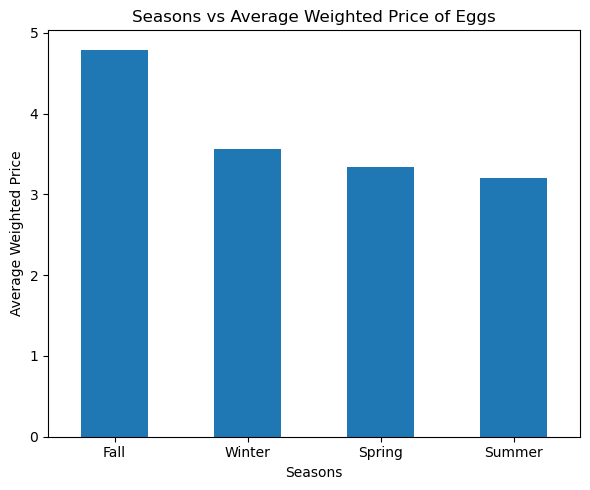

In [6]:
# Generate a bar plot showing the weighted_price mean for each season using Pandas.
bar_plot_data = season_sum_df.groupby("season")["weighted_price"].mean().sort_values(ascending=False) # used clean DataFrame to group by season. Mean and Sort Values
bar_plot = bar_plot_data.plot(kind='bar', figsize=(6,5), rot=0) # Bar plot and the size which will print
plt.xlabel("Seasons") # Establish x-label
plt.ylabel("Average Weighted Price") # Establish y-label
plt.title("Seasons vs Average Weighted Price of Eggs")
plt.tight_layout() #adjust the bar plot

# Save the figure
plt.savefig("Project 1/Seasons_Bar_Graph.png")

# Print bar graph
plt.show()


## Comparison of seasons versus weighted price

The problem: How do we know if one seasons will impact overall weighted price of eggs over other seasons?

The solution: ANOVA:
- Alternative Hypothesis - Is there a significant difference in weighted price between seasons? 
- Null Hypothesis- Is the difference we observe just due to chance?

In [7]:
# Put seasons into a list for a for loop (and later for plot labels)
selected = ["Winter", "Spring", "Summer", "Fall"]

# Create empty list to fill with weighted (for plotting)
weighted = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for x in selected:
    
    # Locate the rows which dates fall on season and get the weighted price
    final_weighted_price = season_sum_df.loc[season_sum_df["season"] == x, "weighted_price"]
    
    # add subset
    weighted.append(final_weighted_price) # Append the resulting weighted price for each season.
    
    # Determine outliers using upper and lower bounds
    quartiles = final_weighted_price.quantile([0.25,0.5,0.75]) # Quartiles calculation
    lowerq = quartiles[0.25] # Lower Quartile
    upperq = quartiles[0.75] # Upper Quartile
    iqr = upperq-lowerq # interquartile
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers= final_weighted_price.loc[(final_weighted_price < lower_bound) | (final_weighted_price > upper_bound)] # outliers upper and lower bounds
    # print the results for four seasons
    print(f"{x}'s potential outliers: {outliers}")


Winter's potential outliers: Series([], Name: weighted_price, dtype: float64)
Spring's potential outliers: Series([], Name: weighted_price, dtype: float64)
Summer's potential outliers: 37    4.87
Name: weighted_price, dtype: float64
Fall's potential outliers: Series([], Name: weighted_price, dtype: float64)


<Axes: title={'center': 'weighted_price'}, xlabel='season'>

Text(0.5, 1.0, 'Seasons vs Weighted Average Cost of Eggs')

Text(0.5, 0, 'Seasons')

Text(0, 0.5, 'Weighted Average Price')

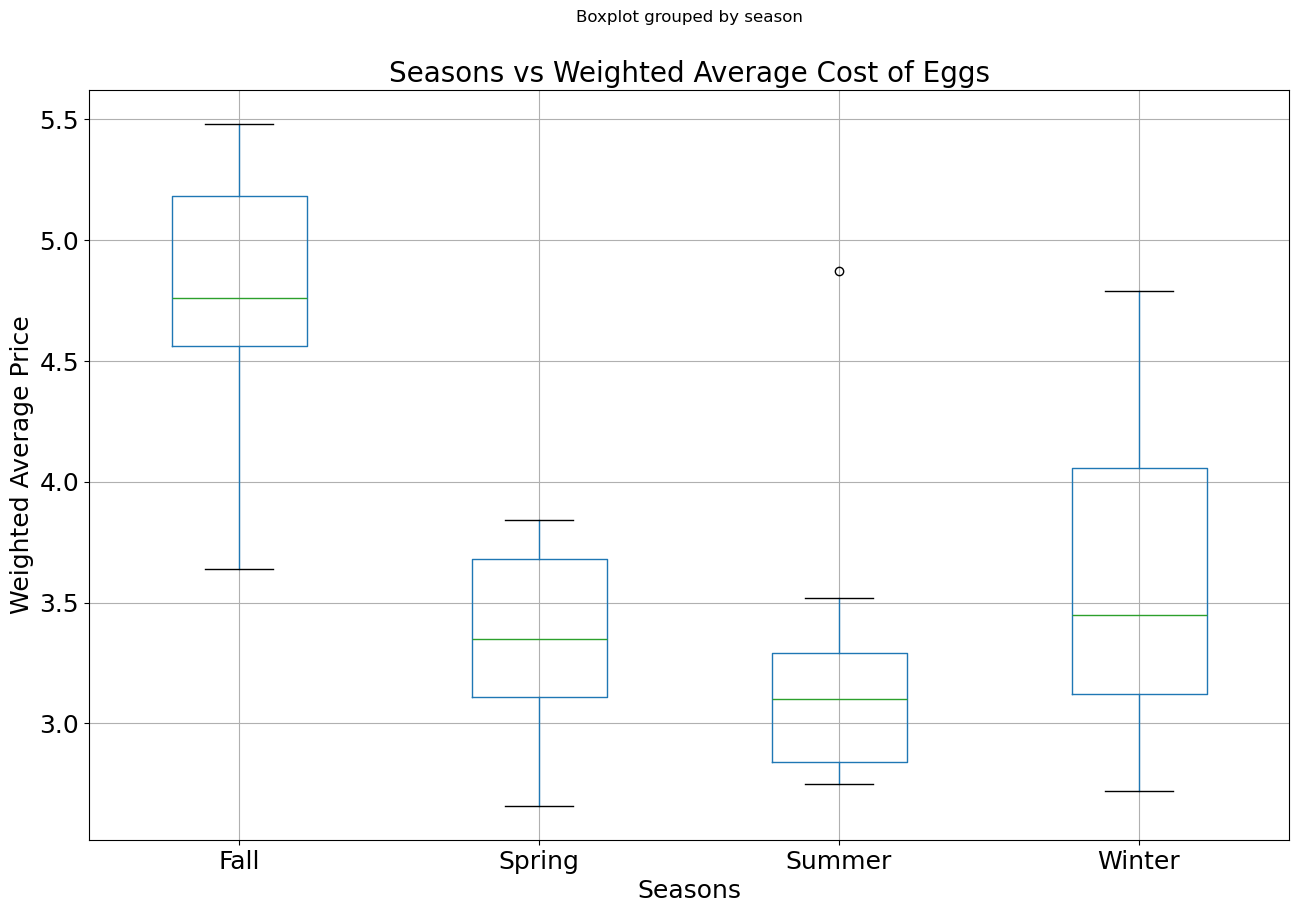

In [25]:
# Create a boxplot to compare means
season_sum_df.boxplot("weighted_price", by="season", figsize=(15, 10), fontsize=18)
plt.title('Seasons vs Weighted Average Cost of Eggs', fontsize=20)
plt.xlabel('Seasons', fontsize=18)
plt.ylabel('Weighted Average Price', fontsize=18)
# Save the figure
plt.savefig("Project 1/Boxplot_grouped_Season.png")

In [9]:
# Extract individual groups
group0 = season_sum_df[season_sum_df["season"] == "Fall"]["weighted_price"]
group1 = season_sum_df[season_sum_df["season"] == "Spring"]["weighted_price"]
group2 = season_sum_df[season_sum_df["season"] == "Summer"]["weighted_price"]
group3 = season_sum_df[season_sum_df["season"] == "Winter"]["weighted_price"]

In [10]:
# Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3)

F_onewayResult(statistic=23.430319519587172, pvalue=3.2426269629127185e-09)

**Discussion about the ANOVA:** 
- The impact of season (3.24e-09) p-value is less than 0.05 which means it is not normally distributed data. 
- P-Value (3.24e-09) < Significance level (0.05), this indicates that there are statistically significant differences among the months.
- We can reject the null hypothesis, which assumes no significant differences.

## Correlation and Regression

Text(2, 4.5, 'y = 0.17x + 2.67')

Text(0.5, 0, '12 - Months')

Text(0, 0.5, 'Average Weighted Price')

Text(0.5, 1.0, 'Months vs Average Weighted Price')

The r-value is: 0.44855434433152536


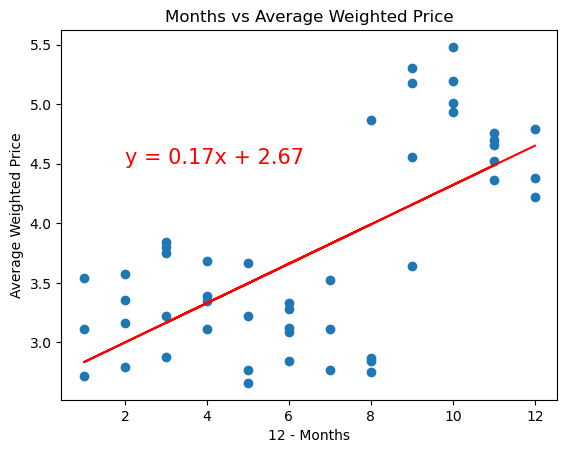

In [11]:
x_values = season_sum_df["month"]
y_values = season_sum_df["weighted_price"]
# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.annotate(line_eq,(2,4.5),fontsize=15,color="red")
plt.xlabel("12 - Months")
plt.ylabel("Average Weighted Price")
plt.title("Months vs Average Weighted Price")
# Print r^2 value
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

**Discussion about the linear relationship:** The linear regression line for 12-months vs Average Weighted Price is positive.
- The correlation between 12-months vs Average Weighted Price is 0.45. This shows a weak correlation between 12-months and Average Weighted Price.